In [1]:
import pandas as pd

df = pd.read_csv("infection_root_barcodes.csv")

print(df.head())

   human_id  t  SNP_0  SNP_1  SNP_2  SNP_3  SNP_4  SNP_5  SNP_6  SNP_7  ...  \
0      8134  0      0      0      0      0      0      0      0      0  ...   
1      2602  0      1      1      1      1      1      1      1      1  ...   
2      6588  0      2      2      2      2      2      2      2      2  ...   
3      1161  0      3      3      3      3      3      3      3      3  ...   
4      3801  0      4      4      4      4      4      4      4      4  ...   

   SNP_14  SNP_15  SNP_16  SNP_17  SNP_18  SNP_19  SNP_20  SNP_21  SNP_22  \
0       0       0       0       0       0       0       0       0       0   
1       1       1       1       1       1       1       1       1       1   
2       2       2       2       2       2       2       2       2       2   
3       3       3       3       3       3       3       3       3       3   
4       4       4       4       4       4       4       4       4       4   

   SNP_23  
0       0  
1       1  
2       2  
3       3  
4 

In [2]:
import numpy as np

In [3]:
df_t = df[df["t"] == 1490]

In [4]:
df_t.shape

(16978, 26)

In [5]:
all_genomes = df_t[[f"SNP_{i}" for i in range(24)]].values

In [6]:
all_genomes.ravel()

array([2529, 2529, 2529, ..., 2427, 3111, 1089], dtype=int64)

In [7]:
roots, counts = np.unique(all_genomes.ravel(), return_counts=True)

root_count_df = pd.DataFrame({"root": roots, "count": counts})

In [8]:
# Fill in the missing roots
root_count_df = pd.merge(root_count_df, pd.DataFrame({"root": np.arange(4000)}), on="root", how="right").fillna(0)

<BarContainer object of 397 artists>

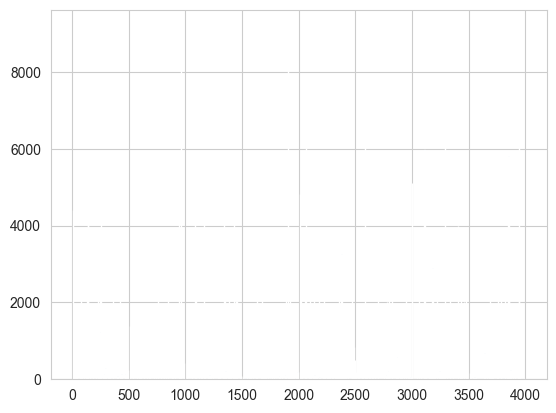

In [9]:
from matplotlib import pyplot as plt

plt.bar(roots, counts)

(array([3.683e+03, 4.600e+01, 2.200e+01, 2.700e+01, 2.000e+01, 1.700e+01,
        1.400e+01, 1.100e+01, 1.300e+01, 1.400e+01, 9.000e+00, 8.000e+00,
        7.000e+00, 6.000e+00, 4.000e+00, 6.000e+00, 5.000e+00, 6.000e+00,
        5.000e+00, 1.000e+01, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

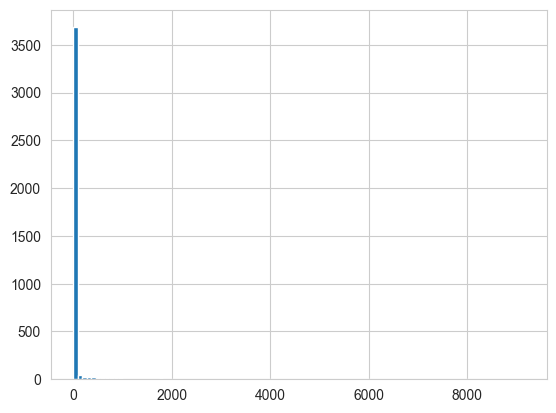

In [10]:
plt.hist(root_count_df["count"], bins=100)

In [11]:
np.median(root_count_df["count"])

0.0

In [12]:
np.sum(root_count_df["count"]>0)

397

(array([195.,  69.,  34.,  32.,  13.,  11.,  14.,   5.,   5.,   6.,   2.,
          2.,   2.,   2.,   1.,   2.,   0.,   0.,   0.,   2.]),
 array([1.0000e+00, 4.5890e+02, 9.1680e+02, 1.3747e+03, 1.8326e+03,
        2.2905e+03, 2.7484e+03, 3.2063e+03, 3.6642e+03, 4.1221e+03,
        4.5800e+03, 5.0379e+03, 5.4958e+03, 5.9537e+03, 6.4116e+03,
        6.8695e+03, 7.3274e+03, 7.7853e+03, 8.2432e+03, 8.7011e+03,
        9.1590e+03]),
 <BarContainer object of 20 artists>)

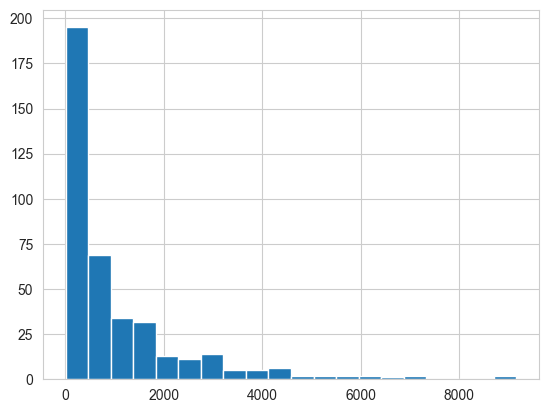

In [13]:
plt.hist(root_count_df["count"][root_count_df["count"]>0], bins=20)

In [14]:
np.sum(root_count_df["count"])

407472.0

In [15]:
407472/24

16978.0

In [16]:
np.max(root_count_df["count"])/np.sum(root_count_df["count"])

0.022477618094004004

In [17]:
np.sum(root_count_df["count"]>1)/4000

0.099